<a href="https://colab.research.google.com/github/vijjus/ST-summer-2024/blob/main/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/vijjus/ST-summer-2024.git

fatal: destination path 'ST-summer-2024' already exists and is not an empty directory.


In [2]:
!ls

family.jpeg  mmod_human_face_detector.dat  sample_data	ST-summer-2024


In [3]:
# we will be using the following packages for our work today
import dlib
import cv2
import imutils
import matplotlib.pyplot as plt

In [4]:
# If you don't see an output from this command, click Runtime -> Change runtime type
# Pick V100
# Runtime should prompt to restart
!nvidia-smi

Thu Apr 11 04:19:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Facial recognition - use a model to detect and identify a face.

In [5]:
image1 = cv2.imread("ST-summer-2024/family.jpeg", cv2.IMREAD_COLOR)

In [6]:
# resize - mainly needed for smaller images
image1 = imutils.resize(image1, width=600)

In [7]:
# color images have 3 channels - Red (R), Blue (B), Green (G)
# change from BGR to RGB format (OpenCV loads images in BGR format)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

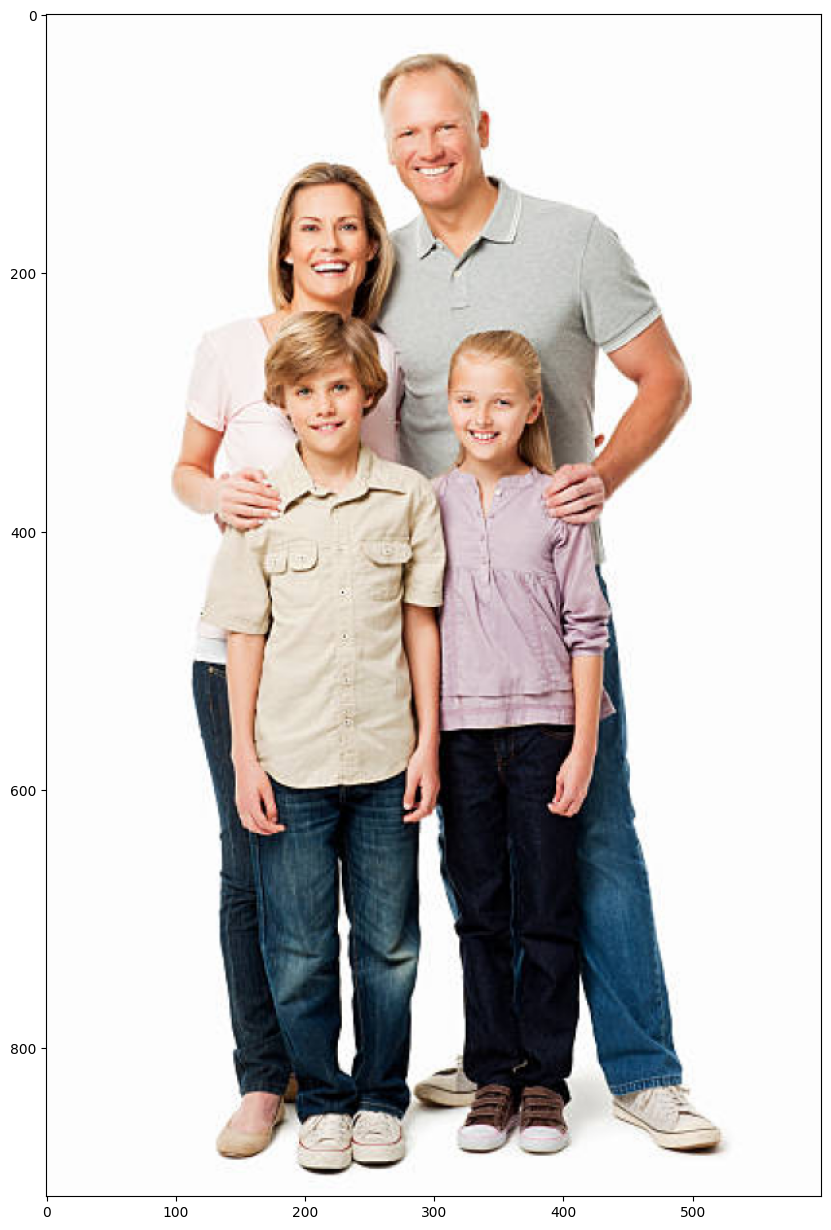

In [8]:
plt.figure(figsize=(10,20))
plt.imshow(image1)

In [9]:
# This is the first detector we are going to try call HOG + SVM
# Histogram of Gradients + Support Vector Machine
detector = dlib.get_frontal_face_detector()

In [12]:
# This detector is good at detecting frontal faces
# XXX: Try detecting a sideways facing face with this detector
rects = detector(image1)

In [13]:
# convenience function to take co-ordinates and convert them to bbox format
# bbox = Bounding Box (used to mark sections of an image)
def convert_and_trim_bb(image, rect):
	# extract the starting and ending (x, y)-coordinates of the
	# bounding box
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()
	# ensure the bounding box coordinates fall within the spatial
	# dimensions of the image
	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])
	# compute the width and height of the bounding box
	w = endX - startX
	h = endY - startY
	# return our bounding box coordinates
	return (startX, startY, w, h)

In [14]:
# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image1, r) for r in rects]

In [15]:
# the boxes are the X, Y (top left, width & height)
boxes

[(181, 149, 72, 72), (261, 69, 72, 72), (301, 277, 72, 72), (181, 269, 72, 72)]

In [16]:
# loop over the bounding boxes
for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 255, 0), 2)

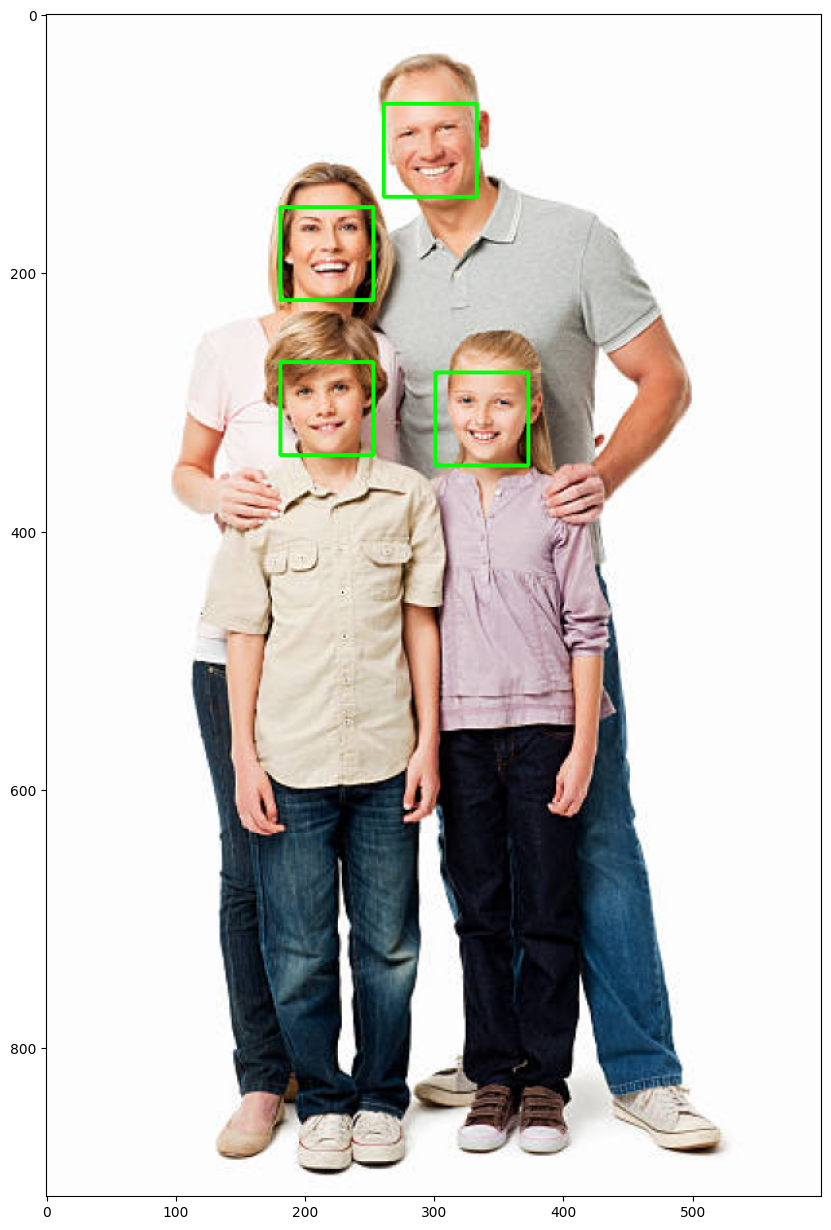

In [17]:
plt.figure(figsize=(10,20))
plt.imshow(image1, cmap="gray")

In [18]:
# Now we will try a Concolutional Neural Network based detector
detector2 = dlib.cnn_face_detection_model_v1("/content/mmod_human_face_detector.dat")

In [19]:
image2 = cv2.imread("ST-summer-2024/family.jpeg", cv2.IMREAD_COLOR)

In [20]:
# resize - mainly needed for smaller images
image2 = imutils.resize(image2, width=600)

In [21]:
# color images have 3 channels - Red (R), Blue (B), Green (G)
# change from BGR to RGB format (OpenCV loads images in BGR format)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [22]:
# this model is running on the GPU
results = detector2(image2)

In [23]:
# convert the resulting dlib rectangle objects to bounding boxes,
# then ensure the bounding boxes are all within the bounds of the
# input image
boxes = [convert_and_trim_bb(image2, r.rect) for r in results]

In [24]:
# loop over the bounding boxes
for (x, y, w, h) in boxes:
	# draw the bounding box on our image
	cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)

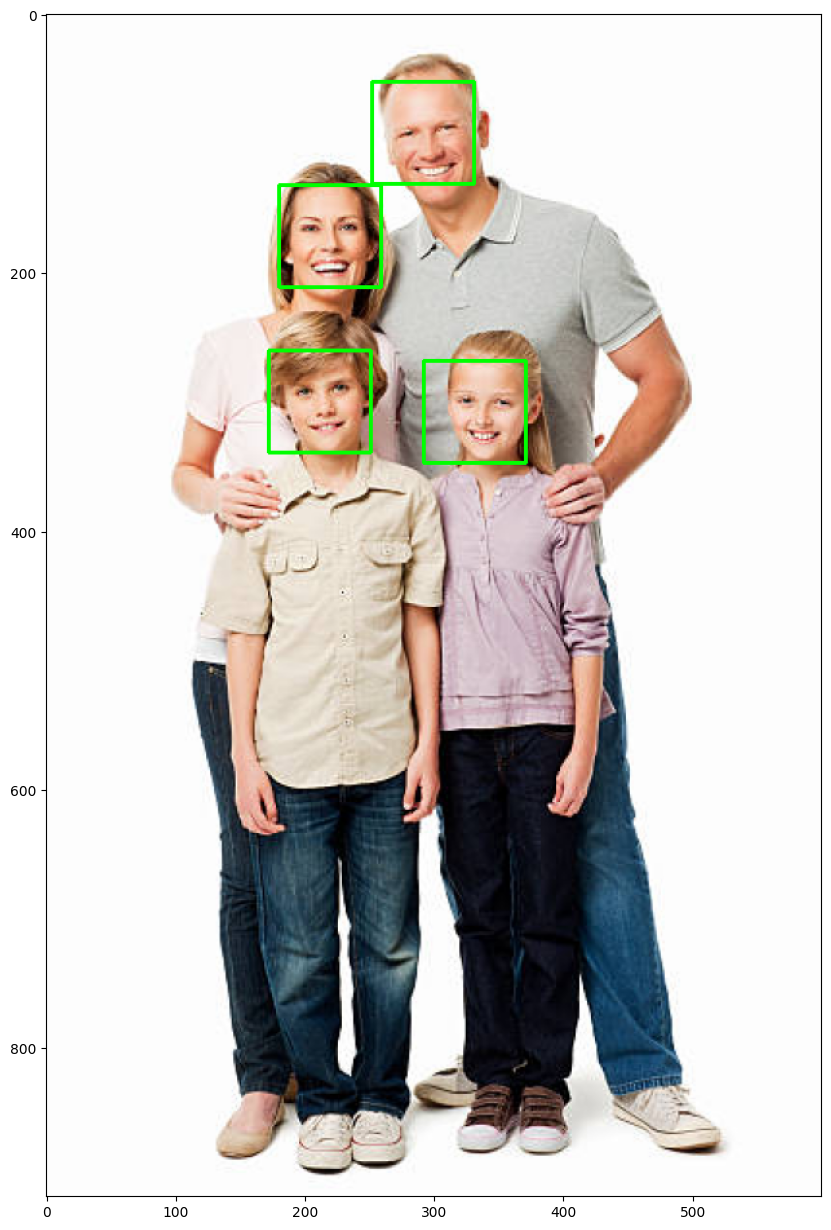

In [25]:
plt.figure(figsize=(10,20))
plt.imshow(image2, cmap="gray")